# Sports Ball Recognizer
The goal of this project is to classify 19 different types of Sports Ball are played in different sports all over the world. The types are following: <br/>
1. Soccer Ball
2. American Football
3. Tennis Ball
4. Base Ball
5. Volleyball
6. Bowling Ball
7. Golf Ball
8. Beach Ball
9. Pool Ball
10. Hockey Puck
11. Badminton
12. Water Polo
13. Squash
14. Wiffleball
15. Cricket Ball
16. Sepak Takraw
17. Table Tennis Ball
18. Basket Ball
19. Lawn Bowls

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dokkho/Capstone Project 2_Image Classifier

/content/drive/MyDrive/Dokkho/Capstone Project 2_Image Classifier


# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [ ]:
doc(search_images_ddg)

In [ ]:
Balls_labels = [
    "Soccer Ball",
    "American Football",
    "Tennis Ball",
    "Base Ball",
    "Volley Ball",
    "Bowling Ball",
    "Golf Ball",
    "Beach Ball",
    "Pool Ball",
    "Hockey Puck",
    "Shuttlecock",
    "Waterpolo Ball",
    "Squash Ball",
    "Wiffle Ball",
    "Cricket Ball",
    "Sepak Takraw",
    "Table Tennis Ball",
    "Basket Ball",
    "Lawn Bowls"
]
len(Balls_labels)

19

In [ ]:
images = search_images_ddg(Balls_labels[2])
f"No of Images => {len(images)} -- One Image URL => {images[2]}"

'No of Images => 200 -- One Image URL => https://www.toptacular.co.uk/wp-content/uploads/2020/10/Tennis-Ball.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "Tennis Ball.jpg"
download_url(images[2], dest, show_progress=False)

Path('Tennis Ball.jpg')

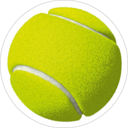

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "Sports Ball data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for Balls_type in Balls_labels:

  dest = f"{data_path}/{Balls_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    Balls_image_urls = search_images_ddg(Balls_type)
    download_images(dest, urls = Balls_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3481) [Path('Sports Ball data/Soccer Ball/d14885f7-02f9-4a69-8d37-49f36307aa69.png'),Path('Sports Ball data/Soccer Ball/02b1391f-90f6-43d5-80f1-7846ec539a5a.jpg'),Path('Sports Ball data/Soccer Ball/360c5f12-e55e-4296-bc07-71faecbfc3e7.png'),Path('Sports Ball data/Soccer Ball/ba11572c-e116-4525-bd23-11de58b99548.png'),Path('Sports Ball data/Soccer Ball/3cbfa246-752a-43f4-81f9-4c7284db9a06.jpg'),Path('Sports Ball data/Soccer Ball/b96271ca-4ce0-4d3b-98ed-fdb030ab5254.jpeg'),Path('Sports Ball data/Soccer Ball/64947feb-cd0d-49e6-bae2-83088a706c8b.jpg'),Path('Sports Ball data/Soccer Ball/703aca4e-8118-4ad1-b66a-a0be84567b6a.jpeg'),Path('Sports Ball data/Soccer Ball/51f10118-3510-40ac-b404-9bb14a5d6d0d.jpg'),Path('Sports Ball data/Soccer Ball/bdf52719-a8ab-47bc-9786-418bb450e497.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#117) [Path('Sports Ball data/Soccer Ball/b6fbc3cf-e8aa-45b1-a3a2-651e3163f108.jpg'),Path('Sports Ball data/Soccer Ball/8e73ca93-8f0a-40c8-85f4-7bb7eefd6381.jpg'),Path('Sports Ball data/Soccer Ball/de1ab0be-626a-4e96-a037-dcb08c8ef4ef.png'),Path('Sports Ball data/American Football/05a024fa-eafb-4953-aede-791e983e7dee.jpg'),Path('Sports Ball data/American Football/cf34fb67-8e4a-43f5-aafb-f9116c56af75.jpg'),Path('Sports Ball data/American Football/718091a9-f625-415a-97f0-6cd0525af143.jpg'),Path('Sports Ball data/American Football/5f4dc9ab-c294-4d95-8e82-af073bfb8b0e.svg'),Path('Sports Ball data/Tennis Ball/0ba5a839-7dc4-4d8c-aa97-c193288c590f.png'),Path('Sports Ball data/Tennis Ball/a445a00f-59b7-487a-b9dd-af4d52be18f4.jpg'),Path('Sports Ball data/Tennis Ball/fee20e20-10f3-4aff-a20f-f04c97c1d8cf.png')...]

In [ ]:
failed.map(Path.unlink)

(#117) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

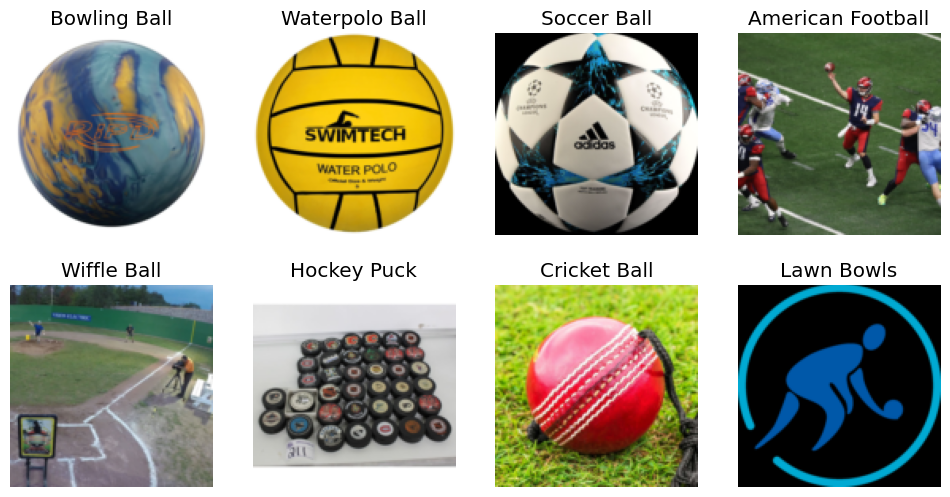

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

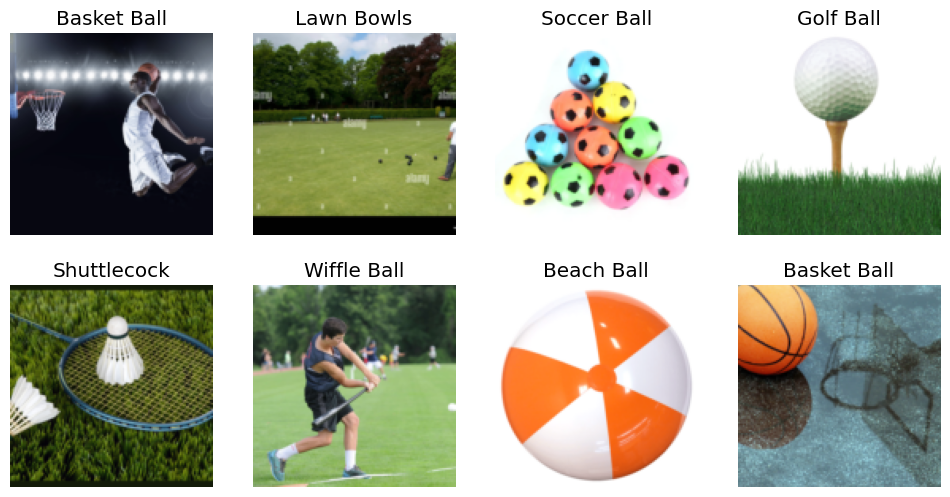

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

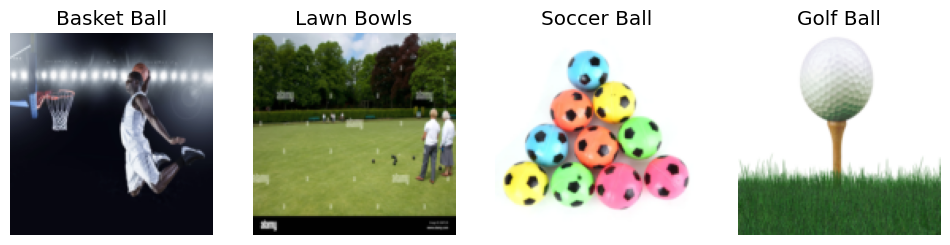

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

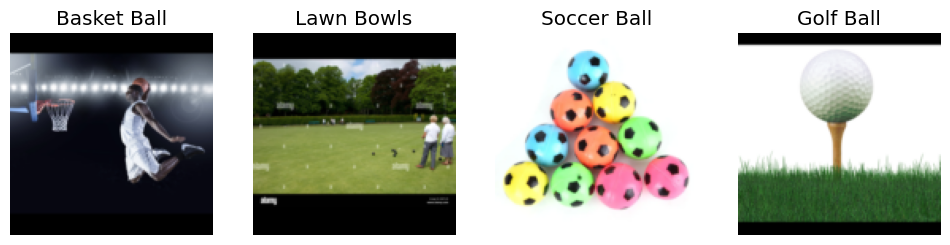

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

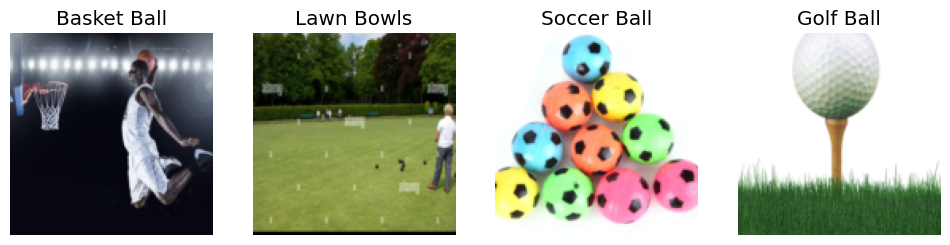

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


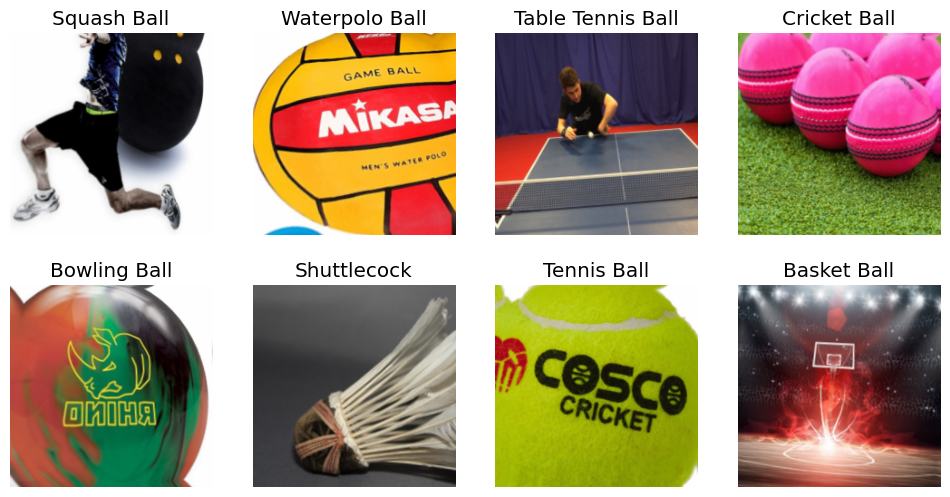

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "sport_balls_dataloader_v0.pkl")